In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
Nx, Ny = 100, 100  # Grid size
dx = 1.0  # Grid spacing in x and y
dt = 0.01  # Time step
M = 1.0  # Mobility constant
kappa = 0.02  # Another constant
Nt = 1000  # Number of time steps

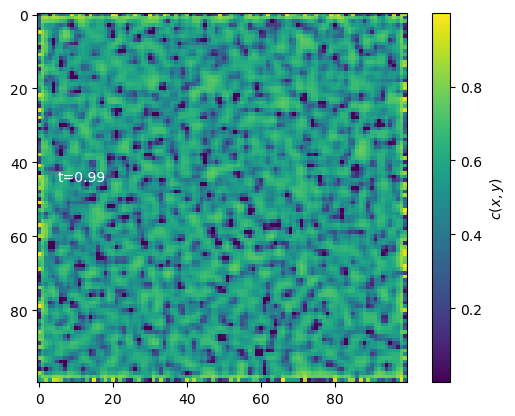

In [2]:
# Initialize concentration field c and chemical potential field mu
c = np.random.rand(Nx, Ny)  # Start with random concentration
c_list = [c.copy()]  # List to store c fields at different times
mu = np.zeros((Nx, Ny))

# Main loop for time evolution
for t in range(Nt):
    # Update mu field based on current c field
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            laplacian_c = (c[i + 1, j] + c[i - 1, j] + c[i, j + 1] + c[i, j - 1] - 4 * c[i, j]) / dx ** 2
            mu[i, j] = c[i, j] ** 3 - c[i, j] - kappa * laplacian_c

    # Update c field based on mu field
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            laplacian_mu = (mu[i + 1, j] + mu[i - 1, j] + mu[i, j + 1] + mu[i, j - 1] - 4 * mu[i, j]) / dx ** 2
            c[i, j] += dt * M * laplacian_mu

    c_list.append(c.copy())  # Store the updated c field

In [ ]:
# Create and save animation
fig, ax = plt.subplots()
im = ax.imshow(c_list[0], cmap='viridis')
cb = plt.colorbar(im)
cb.set_label(r'$c(x,y)$')
tx = ax.text(5, 45, 't={:.2f}'.format(0), color='white')

In [ ]:
def animate(i):
    im.set_data(c_list[i])
    tx.set_text('t={:.2f}'.format(i * dt))
    return [im, tx]

ani = FuncAnimation(fig, animate, frames=Nt, interval=200, blit=True)
writer = PillowWriter(fps=20)
ani.save("concentration_evolution.gif", writer=writer)
plt.show()